In [ ]:
# import packages: numpy 1.22.3, matplotlib 3.2.2, argparse (dependency of cv2?) 1.4.0, OpenCV 4.0.1, os
# python 3.8.3
import numpy as np
import matplotlib.pyplot as plt
import argparse
import json
import cv2
import os
from scipy.linalg import norm
import random
import ast
import seaborn as sns

# For running the code, everone should create a shortcut of the 'CHM327 Discovery Labs' in its 'MyDrive' folder.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import itertools

In [ ]:
# Folder Tests (Should work if you put the 'CHM327 Discovery Labs' shortcut in your 'MyDrive' folder)
os.listdir('./drive/MyDrive/CHM327 Discovery Labs/Pictures')
# Should print --> ['IMG_0022.JPG', 'TidePen', 'Test.JPG', 'UV', 'DetergentControl']

FileNotFoundError: ignored

# Image Analysis

In [ ]:
#main variables
path_to_pictures = './drive/MyDrive/CHM327 Discovery Labs/Pictures'
path_to_saved_data = './drive/MyDrive/CHM327 Discovery Labs/all_data1.txt'
path_to_heatmaps = './drive/MyDrive/CHM327 Discovery Labs/Heatmaps'
path_to_newHeat = './drive/MyDrive/CHM327 Discovery Labs/NewHeatmaps'
path_to_main = './drive/MyDrive/CHM327 Discovery Labs'

In [ ]:
#Main functions
def stain_and_bg(image):
    img = cv2.imread(image)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    stain_xy = []
    bg_r, bg_g, bg_b = [], [], []
    for y in range(len(hsv)):
        for x in range(len(hsv[0])):
            if hsv[y][x][0] <= 60 or hsv[y][x][0] > 112:
                stain_xy.append((x, y))
                # it is the stain
            else:
                # bg_xy.append((x, y))
                g, b, r = img[y][x]
                bg_r.append(r)
                bg_g.append(g)
                bg_b.append(b)
                # it is the background
    bg_r, bg_g, bg_b = np.array(bg_r), np.array(bg_g), np.array(bg_b)
    return stain_xy, [np.mean(bg_r), np.mean(bg_g), np.mean(bg_b)]


def analyse_all_img(imgs_folder, path):
    # NOT WORKING YET
    with open(path_to_saved_data, 'r') as file:
      data = json.load(file)
      for img in imgs_folder:
        if '.DS_Store' in img:
            pass
        else:
            f_path = os.path.join(path, img)
            print(f_path)
            s, bg = stain_and_bg(f_path)
            data.update({f_path: [s, bg]})
    # tempfile = os.path.join(os.path.dirname(), str(uuid.uuid4()))
    with open(path_to_saved_data, 'w') as writer:
        json.dump(data, writer)


def analyse_all_img2(imgs_folder, path):
  # file = open(path_to_saved_data)
  # info = file.read()
  # dct = ast.literal_eval(info)
  # file.close()
  dir = path.split('/')[-1]
  for img in imgs_folder:
    if '.DS_Store' in img:
        pass
    else:
        f_path = os.path.join(path, img)
        s, bg = stain_and_bg(f_path)
        print(f_path, '--', len(s), bg)
        # dct.update({dir: {f_path: [s, bg]}})
  # file = open(path_to_saved_data, 'w')
  # file.write(str(dct))
  # file.close()


def mainControl():
  img_folders = os.listdir(path_to_pictures)
  for folder in img_folders:
    if '.' not in folder:
      print(folder)
      imgs = os.listdir(os.path.join(path_to_pictures, folder))
      path_to_images = os.path.join(path_to_pictures, folder)
      analyse_all_img2(imgs, path_to_images)



In [ ]:
mainControl()

In [ ]:
# Re-initializes the txt file
file = open(path_to_saved_data, 'w')
file.write('{}')
file.close()

In [ ]:
# Tests if data was saved properly
file = open(path_to_saved_data)
info = file.read()
dct = ast.literal_eval(info)
dct.keys()

In [ ]:
p = './drive/MyDrive/CHM327 Discovery Labs/Pictures/TidePen/CranberryStain-2.jpg'
stain_and_bg(p)

# Data Analysis


In [ ]:
# import before and after images first
def dividebyHSV(input_img):
    dirty_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2HSV)
    index_stain = []
    index_bgd = []
    stain_RGB = []
    bgd_RGB = []
    for y in range(len(hsv_image)):
        for x in range(len(hsv_image[0])):
            if hsv_image[y][x][0] <= 60 or hsv_image[y][x][0] > 112:
                index_stain.append((x,y))
                stain_RGB.append(dirty_img[y][x])
            else:
                index_bgd.append((x,y))
                bgd_RGB.append(dirty_img[y][x])

    stain_RGB = np.array(stain_RGB)
    bgd_RGB = np.array(bgd_RGB)
    return [index_stain, stain_RGB, bgd_RGB]

def dividebyHSVAft(input_img):
    dirty_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2HSV)
    index_stain = []
    index_bgd = []
    stain_RGB = []
    bgd_RGB = []
    for y in range(len(hsv_image)):
        for x in range(len(hsv_image[0])):
            if hsv_image[y][x][0] <= 60 or hsv_image[y][x][0] > 112:
                index_stain.append((x,y))
                stain_RGB.append(dirty_img[y][x])
            else:
                index_bgd.append((x,y))
                bgd_RGB.append(dirty_img[y][x])

    if len(np.shape(stain_RGB)) == 1: # optional (used only for percent)
      for i in range(90, 90 + 430):
        for j in range(200, 200 + 400):
          stain_RGB.append(dirty_img[i][j])

    stain_RGB = np.array(stain_RGB)
    bgd_RGB = np.array(bgd_RGB)
    return [index_stain, stain_RGB, bgd_RGB]

def find_stain(image):
    img = cv2.imread(image)
    final_arr = np.ones((len(img), len(img[0]), 3)) * 255
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    for y in range(len(img)):
        for x in range(len(img[0])):
            pixel_rgb = img[y][x]
            if hsv[y][x][0] <= 60 or hsv[y][x][0] > 112:
                final_arr[y][x] = pixel_rgb
    return final_arr

def divideBy(input, what):
    hsv_image = cv2.cvtColor(input, cv2.COLOR_BGR2HSV)
    stain_sat = []
    index_stain = []
    bgd_sat = []
    for y in range(len(hsv_image)):
        for x in range(len(hsv_image[0])):
            if hsv_image[y][x][0] <= 60 or hsv_image[y][x][0] > 112:
                index_stain.append((x,y))
                stain_sat.append(hsv_image[y][x][what])
            else:
                # index_bgd.append((x,y))
                bgd_sat.append(hsv_image[y][x][what])
    return [np.array(index_stain), np.array(stain_sat), np.array(bgd_sat)]

def getMean(array_in):
    r = np.mean(array_in[:,0])
    g = np.mean(array_in[:,1])
    b = np.mean(array_in[:,2])
    return [r,g,b]

def calcRatio(bef, aft):
    nostain = False # off by default
    _, stainB, bgdB = dividebyHSV(bef)
    stain_ind, _, bgdA = dividebyHSV(aft)
    afterimg = cv2.cvtColor(aft, cv2.COLOR_BGR2RGB)
    if len(np.shape(bgdA)) != 2:
      bgdA = cv2.cvtColor(bef, cv2.COLOR_BGR2RGB)
    if len(np.shape(bgdB)) != 2:
      nostain = True
      bgdB = cv2.cvtColor(bef, cv2.COLOR_BGR2RGB)
    if len(stainB.shape) == 1:
      return -1, -1
    else:
      avgstainB = getMean(stainB)
      avg_bgdB = getMean(bgdB)
      avg_bgdA = getMean(bgdA)

      if nostain:
        before_norm = 1
        print("Warning: no stain detected in initial image!")
      else:
        before_norm = norm([x1-x2 for x1,x2 in zip(avgstainB, avg_bgdB)], ord=2)

      after_norms = np.zeros((afterimg.shape[1], afterimg.shape[0]))
      for i in range(afterimg.shape[1]):
          for j in range(afterimg.shape[0]):
              after_norms[i][j] = norm([x1-x2 for x1,x2 in zip(afterimg[j][i], avg_bgdA)], ord=2)
      out = [after/before_norm for after in after_norms]
      return out, nostain

def calcSatRatio(bef, aft, what):
  ind_b, sat_b, b_bgd = divideBy(bef, what)
  ind_a, sat_a, a_bgd = divideBy(aft, what)
  aft_img = cv2.cvtColor(aft, cv2.COLOR_BGR2HSV)
  sat_avg_b = np.mean(sat_b)
  b_avg_bgd = np.mean(b_bgd)
  a_avg_bgd = np.mean(a_bgd)
  aft_norm = np.zeros((aft_img.shape[1], aft_img.shape[0]))
  before_norm = abs(sat_avg_b - b_avg_bgd)
  #norm([x1-x2 for x1,x2 in zip(sat_avg_b, b_avg_bgd)], ord=2)
  for i in range(aft_img.shape[1]):
    for j in range(aft_img.shape[0]):
      aft_norm[i][j] = abs(aft_img[j][i][what] - a_avg_bgd)
      #norm([x1-x2 for x1,x2 in zip(aft_img[j][i], a_avg_bgd)], ord=2)
  out = [after/before_norm for after in aft_norm]
  return out

def calcRatio2(bef, aft):
    nostain = False # off by default
    _, stainB, bgdB = dividebyHSV(bef)
    stain_ind, _, bgdA = dividebyHSV(aft)
    afterimg = cv2.cvtColor(aft, cv2.COLOR_BGR2RGB)
    befimg = cv2.cvtColor(bef, cv2.COLOR_BGR2RGB)
    if len(np.shape(bgdA)) != 2:
      bgdA = cv2.cvtColor(bef, cv2.COLOR_BGR2RGB)
    if len(np.shape(stainB)) != 2:
      nostain = True
      bgdB = cv2.cvtColor(bef, cv2.COLOR_BGR2RGB)
    if len(stainB.shape) == 1:
      return -1, -1, -1
    else:
      avgstainB = getMean(stainB)
      avg_bgdB = getMean(bgdB)
      avg_bgdA = getMean(bgdA)
      normAvgBgd = norm(avg_bgdB, ord=1)

      if nostain:
        before_norm = 1
        print("Warning: no stain detected in initial image!")
      else:
        before_norm = np.zeros((befimg.shape[1], befimg.shape[0]))
        #norm([x1-x2 for x1,x2 in zip(avgstainB, avg_bgdB)], ord=2)
        for i in range(befimg.shape[1]):
          for j in range(befimg.shape[0]):
            before_norm[i][j] = norm(befimg[j][i], ord=1) / normAvgBgd
      after_norm = np.zeros((afterimg.shape[1], afterimg.shape[0]))
      for i in range(afterimg.shape[1]):
          for j in range(afterimg.shape[0]):
              after_norm[i][j] = norm(afterimg[j][i], ord=1) / normAvgBgd

      # out = [after/before_norm for after in after_norms]
      return before_norm, after_norm, nostain

def calcRatio3(bef, aft, wash):
    nostain = False # off by default
    _, stainB, bgdB = dividebyHSV(bef)
    stain_ind, _, bgdA = dividebyHSV(aft)
    wash_ind, _, bgdW = dividebyHSV(wash)
    afterimg = cv2.cvtColor(aft, cv2.COLOR_BGR2RGB)
    befimg = cv2.cvtColor(bef, cv2.COLOR_BGR2RGB)
    washimg = cv2.cvtColor(wash, cv2.COLOR_BGR2RGB)
    if len(np.shape(bgdA)) != 2:
      bgdA = cv2.cvtColor(bef, cv2.COLOR_BGR2RGB)
    if len(np.shape(stainB)) != 2:
      nostain = True
      bgdB = cv2.cvtColor(bef, cv2.COLOR_BGR2RGB)
    if len(stainB.shape) == 1:
      return -1, -1, -1, -1
    else:
      avgstainB = getMean(stainB)
      avg_bgdB = getMean(bgdB)
      avg_bgdA = getMean(bgdA)
      normAvgBgd = norm(avg_bgdB, ord=1)

      if nostain:
        before_norm = -1
        after_norm = -1
        wash_norm = -1
        print("Warning: no stain detected in initial image!")
      else:
        before_norm = np.zeros((befimg.shape[1], befimg.shape[0]))
        #norm([x1-x2 for x1,x2 in zip(avgstainB, avg_bgdB)], ord=2)
        for i in range(befimg.shape[1]):
          for j in range(befimg.shape[0]):
            before_norm[i][j] = norm(befimg[j][i], ord=1) / normAvgBgd
        after_norm = np.zeros((afterimg.shape[1], afterimg.shape[0]))
        for i in range(afterimg.shape[1]):
            for j in range(afterimg.shape[0]):
                after_norm[i][j] = norm(afterimg[j][i], ord=1) / normAvgBgd
        wash_norm = np.zeros((washimg.shape[1], washimg.shape[0]))
        for i in range(washimg.shape[1]):
            for j in range(washimg.shape[0]):
                wash_norm[i][j] = norm(washimg[j][i], ord=1) / normAvgBgd
        # out = [after/before_norm for after in after_norms]
      return before_norm, after_norm, wash_norm, nostain


In [ ]:
def divideByRatios(img):
  bgd = []
  stain = []
  test_img = np.ones((len(img), len(img[0]), 3)) * 255
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  w, h = 100, 100
  for i in range(h):
    for j in range(w):
      bgd.append(norm(img[j][i], ord=1))
  avg_bgd = np.mean(bgd)
  for x in range(img.shape[1]):
    for y in range(img.shape[0]):
      if norm(img[y][x], ord=1) / avg_bgd < 0.87:
        # if hsv[y][x][0] <= 60 or hsv[y][x][0] > 112:
        stain.append(img[y][x])
        test_img[y][x] = np.array(img[y][x])
  return stain, test_img

In [ ]:
test_cran = f'{path_to_pictures}/UV/Cranberry/2/CranberryUV-2.jpg'
test_chili = f'{path_to_pictures}/DetergentControl/Chili/3/ChiliDetergent-3.JPG'
test_turmeric = f'{path_to_pictures}/DishSoap/Turmeric/1/TurmericDishBS-1.JPG'
img = cv2.imread(test_chili)

In [ ]:
s, arr = divideByRatios(img)

In [ ]:
display(arr)

#Testing for Cross-Method Comparison

In [ ]:
import pandas as pd

In [ ]:
def compare(bef, aft):
  _, stainB, bgdB = dividebyHSV(bef)
  if len(np.shape(stainB)) == 1:
    return None, None
  _, stainA, bgdA = dividebyHSVAft(aft)
  dirtier = True # true == how much dirtier it got, false == how much cleaner it got
  avg_normB = np.mean([norm(x, ord=1) for x in stainB])
  if len(np.shape(stainA)) == 1:
    avg_normA = np.mean([norm(x, ord=1) for x in bgdA])
  else:
    avg_normA = np.mean([norm(x, ord=1) for x in stainA])
  diff = avg_normA - avg_normB
  if diff < 0:
    return round(abs(diff)/avg_normB * 100, 2), "Dirtier"
  else:
    return round(diff/avg_normB * 100, 2), "Cleaner"

In [ ]:
turmericA = cv2.imread(f'{path_to_pictures}/DishSoap/Turmeric/1/TurmericDishBS-1.JPG')
turmericB = cv2.imread(f'{path_to_pictures}/DishSoap/Turmeric/1/TurmericStainDish-1.JPG')
turmericUB = cv2.imread(f'{path_to_pictures}/UV/Turmeric/1/TurmericStain-1.jpg')
turmericUA = cv2.imread(f'{path_to_pictures}/UV/Turmeric/1/TurmericUV-1.jpg')
turmericUW = cv2.imread(f'{path_to_pictures}/UV/Turmeric/1/TurmericUVDetergent-1.jpg')
chiliB = cv2.imread(f'{path_to_pictures}/UV/Chili/1/ChiliStain-1.jpg')
chiliA = cv2.imread(f'{path_to_pictures}/UV/Chili/1/ChiliUV-1.jpg')
x, x1 = compare(turmericB, turmericA)
y, y1 = compare(turmericUB, turmericUA)
z, z1 = compare(turmericUB, turmericUW)
a, a1 = compare(chiliB, chiliA)
print("Dish soap: ", x, x1, "\nUV: ", y, y1, "\nUV+Wash: ", z, z1, "\nChili: ", a, a1)

Dish soap:  31.78 Dirtier 
UV:  10.72 Cleaner 
UV+Wash:  10.03 Cleaner 
Chili:  21.72 Cleaner


In [ ]:
chiliB = cv2.imread(f'{path_to_pictures}/TidePen/Chili/1/ChiliStain-1.jpg')
chiliA = cv2.imread(f'{path_to_pictures}/TidePen/Chili/1/ChiliTidePenDetergent-1.jpg')
c, c1 = compare(chiliB, chiliA)
c, c1

(12.25, 'Cleaner')

In [ ]:
def compare_all():
  for folder in os.listdir(path_to_pictures):
    data = prep_data(folder)
    for stain_type in data:
      set_dct = data[stain_type]
      if stain_type not in dct["Stain_Type"]:
        dct["Stain_Type"].append(stain_type)
      for pic_set in set_dct:
        if folder == 'DetergentControl':
          path, before, wash = set_dct[pic_set]
          before = cv2.imread(os.path.join(path, before))
          wash = cv2.imread(os.path.join(path, wash))
          bw_cp, stateW = compare(before, wash)
          dct[f'{folder}W{pic_set}'].append(bw_cp)
          dct[f'{folder}W_State{pic_set}'].append(stateW)

        else:
          path, before, after, wash = set_dct[pic_set]
          before = cv2.imread(os.path.join(path, before))
          after = cv2.imread(os.path.join(path, after))
          wash = cv2.imread(os.path.join(path, wash))
          ba_cp, stateA = compare(before, after)
          bw_cp, stateW = compare(before, wash)
          dct[f'{folder}{pic_set}'].append(ba_cp)
          dct[f'{folder}_State{pic_set}'].append(stateA)
          dct[f'{folder}W{pic_set}'].append(bw_cp)
          dct[f'{folder}W_State{pic_set}'].append(stateW)
  return dct

In [ ]:
dct = {"Stain_Type": []}
for x in os.listdir(path_to_pictures):
  for i in range(3):
    if x == "DetergentControl":
      dct.update({x+"W"+f'{i+1}': []})
      dct.update({x+"W"+"_State"+f'{i+1}': []})
    else:
      dct.update({x+f'{i+1}': []})
      dct.update({x+"_State"+f'{i+1}': []})
      dct.update({x+"W"+f'{i+1}': []})
      dct.update({x+"W"+"_State"+f'{i+1}': []})
dct

{'Stain_Type': [],
 'UV1': [],
 'UV_State1': [],
 'UVW1': [],
 'UVW_State1': [],
 'UV2': [],
 'UV_State2': [],
 'UVW2': [],
 'UVW_State2': [],
 'UV3': [],
 'UV_State3': [],
 'UVW3': [],
 'UVW_State3': [],
 'TidePen1': [],
 'TidePen_State1': [],
 'TidePenW1': [],
 'TidePenW_State1': [],
 'TidePen2': [],
 'TidePen_State2': [],
 'TidePenW2': [],
 'TidePenW_State2': [],
 'TidePen3': [],
 'TidePen_State3': [],
 'TidePenW3': [],
 'TidePenW_State3': [],
 'DetergentControlW1': [],
 'DetergentControlW_State1': [],
 'DetergentControlW2': [],
 'DetergentControlW_State2': [],
 'DetergentControlW3': [],
 'DetergentControlW_State3': [],
 'DishSoap1': [],
 'DishSoap_State1': [],
 'DishSoapW1': [],
 'DishSoapW_State1': [],
 'DishSoap2': [],
 'DishSoap_State2': [],
 'DishSoapW2': [],
 'DishSoapW_State2': [],
 'DishSoap3': [],
 'DishSoap_State3': [],
 'DishSoapW3': [],
 'DishSoapW_State3': []}

In [ ]:
dct = compare_all()
dct

{'Stain_Type': ['Chili', 'Turmeric', 'Cranberry'],
 'UV1': [21.72, 10.72, 6.62],
 'UV_State1': ['Cleaner', 'Cleaner', 'Cleaner'],
 'UVW1': [0.49, 10.03, 16.36],
 'UVW_State1': ['Dirtier', 'Cleaner', 'Cleaner'],
 'UV2': [None, 9.13, 14.01],
 'UV_State2': [None, 'Cleaner', 'Cleaner'],
 'UVW2': [None, 18.6, 24.36],
 'UVW_State2': [None, 'Cleaner', 'Cleaner'],
 'UV3': [18.38, 15.64, 8.93],
 'UV_State3': ['Cleaner', 'Cleaner', 'Cleaner'],
 'UVW3': [25.89, 19.65, 16.27],
 'UVW_State3': ['Cleaner', 'Cleaner', 'Cleaner'],
 'TidePen1': [8.54, 9.81, 9.3],
 'TidePen_State1': ['Cleaner', 'Dirtier', 'Cleaner'],
 'TidePenW1': [15.25, 2.16, 18.13],
 'TidePenW_State1': ['Cleaner', 'Dirtier', 'Cleaner'],
 'TidePen2': [3.99, 9.87, 1.39],
 'TidePen_State2': ['Cleaner', 'Dirtier', 'Dirtier'],
 'TidePenW2': [20.67, 2.14, 11.52],
 'TidePenW_State2': ['Cleaner', 'Dirtier', 'Cleaner'],
 'TidePen3': [5.0, 9.71, 19.05],
 'TidePen_State3': ['Cleaner', 'Dirtier', 'Cleaner'],
 'TidePenW3': [0.33, 7.33, 11.26],
 'T

In [ ]:
dct["Stain_Type"] = dct["Stain_Type"][:3]

In [ ]:
df = pd.DataFrame(dct)
df.head()

,Stain_Type,UV1,UV_State1,UVW1,UVW_State1,UV2,UV_State2,UVW2,UVW_State2,UV3,...,DishSoapW1,DishSoapW_State1,DishSoap2,DishSoap_State2,DishSoapW2,DishSoapW_State2,DishSoap3,DishSoap_State3,DishSoapW3,DishSoapW_State3
0,Chili,21.72,Cleaner,0.49,Dirtier,NaN,None,NaN,None,18.38,...,17.37,Cleaner,7.64,Cleaner,18.12,Cleaner,0.81,Cleaner,52.92,Dirtier
1,Turmeric,10.72,Cleaner,10.03,Cleaner,9.13,Cleaner,18.60,Cleaner,15.64,...,17.50,Cleaner,17.22,Dirtier,13.95,Cleaner,29.66,Dirtier,8.26,Cleaner
2,Cranberry,6.62,Cleaner,16.36,Cleaner,14.01,Cleaner,24.36,Cleaner,8.93,...,42.74,Cleaner,14.62,Dirtier,22.60,Cleaner,16.23,Cleaner,16.39,Cleaner


In [ ]:
df.to_csv(f'{path_to_main}/CrossMethodComparison.csv')

In [ ]:
import matplotlib.patches as patches
test = cv2.imread(f'{path_to_pictures}/DishSoap/Turmeric/1/TurmericDishDetergent-1.JPG')
test2

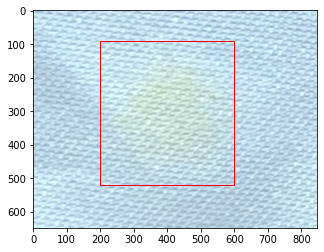

In [ ]:
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
ax = plt.gca()
rect = patches.Rectangle((200, 90), 400, 430, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

## **Functions that will iterate through the folders to get the pictures and analyse then using Jerry's code (before, after, wash) and save the heatmaps in the folder 'Heatmaps' in the Discovery lab folder.**

In [ ]:
# USED TO TEST DIFFERENT FUNCTIONALITIES
x = [1, 2, 3]
y = [20, 34, 80]
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.title('kbejewbivbiberviberv\nwbfeiwbeivr')
plt.savefig(os.path.join(path_to_heatmaps, 'test.jpg'))

In [ ]:
s = 'hellPre1223.jpg'
'Pre' in s

True

In [ ]:
#Functions
def prep_data(folder_to_test):  # The folder_to_test variable should be UV, TidePen, or DetergentControl
  path = os.path.join(path_to_pictures, folder_to_test)
  final_dct = {'Chili': {}, 'Turmeric': {}, 'Cranberry': {}}
  for stain_type in os.listdir(path):
    path2 = os.path.join(path, stain_type)
    # print('--', stain_type, '--')
    for pic_set in os.listdir(path2):
      path3 = os.path.join(path2, pic_set)
      # print('\t', '--', pic_set, '--')
      for img in os.listdir(path3):
        # print('\t\t', img)
        if folder_to_test == 'DetergentControl':
          if 'Pre' in img:
            before = img
            # before img
          else:
            wash = img
            # wash img
        else:
          if 'Stain' in img:
            before = img
            # before img
          elif 'Detergent' in img:
            wash = img
            # wash img
          else:
            after = img
            # after img
      if folder_to_test == 'DetergentControl':
        final_dct[stain_type].update({pic_set: [path3, before, wash]})
      else:
        final_dct[stain_type].update({pic_set: [path3, before, after, wash]})
  return final_dct

def analyze(data, folder):
  for stain_type in data:
    set_dct = data[stain_type]
    ba_ratio_lst = []
    bw_ratio_lst = []
    for pic_set in set_dct:
      if folder == 'DetergentControl':
        path, before, wash = set_dct[pic_set]
        before = cv2.imread(os.path.join(path, before))
        wash = cv2.imread(os.path.join(path, wash))
        print("Detergent Control:", stain_type, '-', pic_set)
        b_w_ratios, notstain_bw = calcRatio(before, wash)
        if b_w_ratios == -1 and notstain_bw == -1:
          pass
        elif not notstain_bw:
          plt.imshow(b_w_ratios, cmap='rainbow', interpolation='nearest')
          plt.colorbar()
          plt.title(f'The Magnitude Change of the RGB values of\n{stain_type}-{pic_set} after Detergent Wash')
          plt.savefig(f'{path_to_heatmaps}/{folder}Detergent_{stain_type}_{pic_set}.jpg')
          plt.clf()
        else:
          print(f'{stain_type}-{pic_set}: no stain found')

      else:
        path, before, after, wash = set_dct[pic_set]
        before = cv2.imread(os.path.join(path, before))
        after = cv2.imread(os.path.join(path, after))
        wash = cv2.imread(os.path.join(path, wash))
        print(stain_type, '-', pic_set)
        b_a_ratios, notstain_ba = calcRatio(before, after)
        if b_a_ratios == -1 and notstain_ba == -1:
          pass
        elif not notstain_ba: # ONLY NEED TO CHECK BEFORE-WASH IF BEFORE HAS STAIN
          b_w_ratios, notstain_bw = calcRatio(before, wash)
        else:
          notstain_bw = True
        if b_a_ratios == -1 and notstain_ba == -1:
          pass
        elif not notstain_ba:
          plt.imshow(b_a_ratios, cmap='rainbow', interpolation='nearest')
          plt.colorbar()
          plt.title(f'The Magnitude Change of the RGB values\nof {stain_type}-{pic_set} after {folder}')
          plt.savefig(f'{path_to_heatmaps}/{folder}_{stain_type}_{pic_set}.jpg')
          plt.clf()
        else:
          print(f'{stain_type}-{pic_set}: no stain found')
        if b_a_ratios == -1 and notstain_ba == -1:
          pass
        elif not notstain_bw:
          plt.imshow(b_w_ratios, cmap='rainbow', interpolation='nearest')
          plt.colorbar()
          plt.title(f'The Magnitude Change of the RGB values of\n{stain_type}-{pic_set} after {folder} and Detergent Wash')
          plt.savefig(f'{path_to_heatmaps}/{folder}Detergent_{stain_type}_{pic_set}.jpg')
          plt.clf()
        else:
          print(f'{stain_type}-{pic_set}: no stain found')

    ##USELESS CODE
      # ba_ratio_lst.append(b_a_ratios)
      # bw_ratio_lst.append(b_w_ratios)
    # ba_ratio_lst = np.array(ba_ratio_lst)
    # bw_ratio_lst = np.array(bw_ratio_lst)
    # ba_mean = ba_ratio_lst.mean(axis=0)
    # bw_mean = bw_ratio_lst.mean(axis=0)

def analyzeChange(data, folder):
  for stain_type in data:
    set_dct = data[stain_type]
    ba_ratio_lst = []
    bw_ratio_lst = []
    for pic_set in set_dct:
      if folder == 'DetergentControl':
        path, before, wash = set_dct[pic_set]
        before = cv2.imread(os.path.join(path, before))
        wash = cv2.imread(os.path.join(path, wash))
        print("Detergent Control:", stain_type, '-', pic_set)
        bef_norm, wash_norm, notstain_bw = calcRatio2(before, wash)
        if not isinstance(bef_norm, np.ndarray) and bef_norm == -1 and notstain_bw == -1:
          pass
        elif not notstain_bw:
          plt.imshow(bef_norm, cmap='rainbow', interpolation='nearest')
          plt.colorbar()
          plt.title(f'The RGB values of\n{stain_type}-{pic_set} compared to background RBG')
          plt.savefig(f'{path_to_newHeat}/{folder}_{stain_type}_{pic_set}.jpg')
          plt.clf()
          plt.imshow(wash_norm, cmap='rainbow', interpolation='nearest')
          plt.colorbar()
          plt.title(f'The RGB values of washed\n{stain_type}-{pic_set} compared to background RBG')
          plt.savefig(f'{path_to_newHeat}/{folder}_{stain_type}_{pic_set}_washed.jpg')
          plt.clf()
        else:
          print(f'{stain_type}-{pic_set}: no stain found')

      else:
        path, before, after, wash = set_dct[pic_set]
        before = cv2.imread(os.path.join(path, before))
        after = cv2.imread(os.path.join(path, after))
        wash = cv2.imread(os.path.join(path, wash))
        print(stain_type, '-', pic_set)
        befNorm, aftNorm, washNorm, notstain_ba = calcRatio3(before, after, wash)
        # if befNorm == -1 and notstain_ba == -1:
        #   pass
        # elif not notstain_ba: # ONLY NEED TO CHECK BEFORE-WASH IF BEFORE HAS STAIN
        #   bef_norm, notstain_bw = calcRatio(before, wash)
        # else:
        #   notstain_bw = True
        if not isinstance(befNorm, np.ndarray) and befNorm == -1 and notstain_ba == -1:
          pass
        elif not notstain_ba:
          plt.imshow(befNorm, cmap='rainbow', interpolation='nearest')
          plt.colorbar()
          plt.title(f'The RGB values of\n{stain_type}-{pic_set} compared to background RBG')
          plt.savefig(f'{path_to_newHeat}/{stain_type}_{pic_set}.jpg')
          plt.clf()
          plt.imshow(aftNorm, cmap='rainbow', interpolation='nearest')
          plt.colorbar()
          plt.title(f'The RGB values of treated\n{stain_type}-{pic_set} compared to background RBG')
          plt.savefig(f'{path_to_newHeat}/{stain_type}_{pic_set}_{folder}.jpg')
          plt.clf()
          plt.imshow(washNorm, cmap='rainbow', interpolation='nearest')
          plt.colorbar()
          plt.title(f'The RGB values of washed\n{stain_type}-{pic_set} compared to background RBG')
          plt.savefig(f'{path_to_newHeat}/{stain_type}_{pic_set}_{folder}_washed.jpg')
          plt.clf()
        else:
          print(f'{stain_type}-{pic_set}: no stain found')
        # if befNorm == -1 and notstain_ba == -1:
        #   pass
        # elif not notstain_bw:
        #   plt.imshow(bef_norm, cmap='rainbow', interpolation='nearest')
        #   plt.colorbar()
        #   plt.title(f'The Magnitude Change of the RGB values of\n{stain_type}-{pic_set} after {folder} and Detergent Wash')
        #   plt.savefig(f'{path_to_heatmaps}/{folder}Detergent_{stain_type}_{pic_set}.jpg')
        #   plt.clf()
        # else:
        #   print(f'{stain_type}-{pic_set}: no stain found')

In [ ]:
def add_RGB(before, after, wash=[]):
  combined_bef = [0]*np.shape(before)[0]
  combined_aft = [0]*np.shape(after)[0]

  for i in range(len(combined_bef)):
    combined_bef[i] = norm(before[i,:], ord=1)
  for i in range(len(combined_aft)):
    combined_aft[i] = norm(after[i,:], ord=1)

  if len(wash) != 0:
    combined_wash = [0]*np.shape(wash)[0]
    for i in range(len(combined_wash)):
      combined_wash[i] = norm(wash[i,:], ord=1)
    return combined_bef, combined_aft, combined_wash
  else:
    return combined_bef, combined_aft

def getHist(data, folder):
  for stain_type in data:
    set_dct = data[stain_type]
    for pic_set in set_dct:
      if folder == "DetergentControl":
        path, bef, wash = set_dct[pic_set]
        _, bef_rgb, bef_bgd = dividebyHSV(cv2.imread(os.path.join(path, bef)))
        _, wash_rgb, wash_bg = dividebyHSV(cv2.imread(os.path.join(path, wash)))
        if len(np.shape(wash_rgb)) == 1:
          wash_rgb = wash_bg
        if len(np.shape(bef_rgb)) == 1:
          print(f"No stain found: {folder}/{stain_type}-{pic_set}")
        else:
          print(f'{stain_type}-{pic_set}')
          added_bef, added_wash = add_RGB(bef_rgb, wash_rgb)
          b = [0]*np.shape(bef_bgd)[0]
          for i in range(len(b)):
            b[i] = norm(bef_bgd[i,:], ord=1)
          avg = np.mean(b)

          stain = f'Only {stain_type} stain'
          sns.distplot(added_bef, color='black', hist=False)
          sns.distplot(added_wash, color='blue', hist=False)
          plt.axvline(avg, color="#f68289", linestyle="--")
          sns.set(rc={'figure.figsize':(30, 15)})
          sns.set(font_scale=1.5)
          plt.legend(loc='upper right', labels=[stain, "After washing", "Average fabric"])
          plt.savefig(f'./drive/MyDrive/CHM327 Discovery Labs/HistogramsUpdated/{folder}/hist_{stain_type}_{pic_set}')
          plt.clf()
      else:
        path, bef, aft, wash = set_dct[pic_set]
        _, bef_rgb, bef_bgd = dividebyHSV(cv2.imread(os.path.join(path, bef)))
        _, aft_rgb, aft_bg = dividebyHSV(cv2.imread(os.path.join(path, aft)))
        _, wash_rgb, wash_bg = dividebyHSV(cv2.imread(os.path.join(path, wash)))
        if len(np.shape(aft_rgb)) == 1:
          aft_rgb = aft_bg
        if len(np.shape(wash_rgb)) == 1:
          wash_rgb = wash_bg
        if len(np.shape(bef_rgb)) == 1:
          print(f"No stain found: {folder}/{stain_type}-{pic_set}")
        else:
          print(f'{stain_type}-{pic_set}')
          added_bef, added_aft, added_wash = add_RGB(bef_rgb, aft_rgb, wash_rgb)
          b = [0]*np.shape(bef_bgd)[0]
          for i in range(len(b)):
            b[i] = norm(bef_bgd[i,:], ord=1)
          avg = np.mean(b)

          sns.distplot(added_bef, color='black', hist=False)
          sns.distplot(added_aft, color='orange', hist=False)
          sns.distplot(added_wash, color='blue', hist=False)
          plt.axvline(avg, color="#f68289", linestyle="--")
          sns.set(rc={'figure.figsize':(30, 15)})
          sns.set(font_scale=1.5)
          treatment = f'After {folder}'
          stain = f'Only {stain_type} stain'
          plt.legend(loc='upper right', labels=[stain, treatment, "After washing", "Average fabric"])
          plt.savefig(f'./drive/MyDrive/CHM327 Discovery Labs/HistogramsUpdated/{folder}/hist_{stain_type}_{pic_set}')
          plt.clf()


In [ ]:
len(np.shape([[]]))

2

In [ ]:
#Get hist
folder = 'TidePen'
folder_data = prep_data(folder)
getHist(folder_data, folder)

Chili-1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Chili-3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Chili-2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Turmeric-1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Turmeric-3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Turmeric-2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Cranberry-1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Cranberry-3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Cranberry-2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 2160x1080 with 0 Axes>

In [ ]:
#Get Heatmaps
folder = 'TidePen'
data = prep_data(folder)
analyzeChange(data, folder)

In [ ]:
path_bef = f'{path_to_pictures}/TidePen/Turmeric/1/TurmericStain-1.jpg'
path_aft = f'{path_to_pictures}/TidePen/Turmeric/1/TurmericTidePen-1.jpg'
path_wash = f'{path_to_pictures}/TidePen/Turmeric/1/TurmericTidePenDetergent-1.jpg'

In [ ]:
b, a, w, s = calcRatio3(cv2.imread(path_bef), cv2.imread(path_aft), cv2.imread(path_wash))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#plt.imshow(before, cmap='rainbow', interpolation='nearest', ax=axes[0])
#plt.imshow(after, cmap='rainbow', interpolation='nearest', ax=axes[1])
a1 = ax1.imshow(b, cmap='rainbow', interpolation='nearest')
a2 = ax2.imshow(a, cmap='rainbow', interpolation='nearest')
a3 = ax3.imshow(w, cmap='rainbow', interpolation='nearest')

fig.tight_layout()
plt.show()

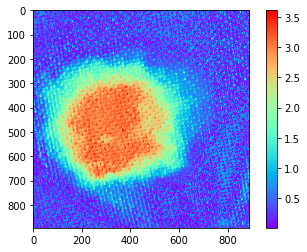

In [ ]:
bef, aft = cv2.imread(path_bef), cv2.imread(path_aft)
allratios, x = calcRatio(bef, aft)

plt.imshow(allratios, cmap='rainbow', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
img = cv2.imread(path_bef)
img_aft = cv2.imread(path_aft)
indexes, stain, bgd = dividebyHSV(img)
indexes2, stain2, bgd2 = dividebyHSV(img_aft)

In [ ]:
R = stain[:, 0]
G = stain[:, 1]
B = stain[:, 2]
R2 = stain2[:, 0]
G2 = stain2[:, 1]
B2 = stain2[:, 2]

In [ ]:
combined = [0]*np.shape(stain)[0]
combined2 = [0]*np.shape(stain)[0]
for i in range(len(combined)):
  combined[i] = norm(stain[i,:], ord=1)
  combined2[i] = norm(stain2[i,:], ord=1)

In [ ]:
b = [0]*np.shape(bgd)[0]
for i in range(len(b)):
  b[i] = norm(bgd[i,:], ord=1)
avg = np.mean(b)

In [ ]:
back = []
for x in range(4):
  if x%2:
    back.append(avg)
  else:
    back.append(avg-0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


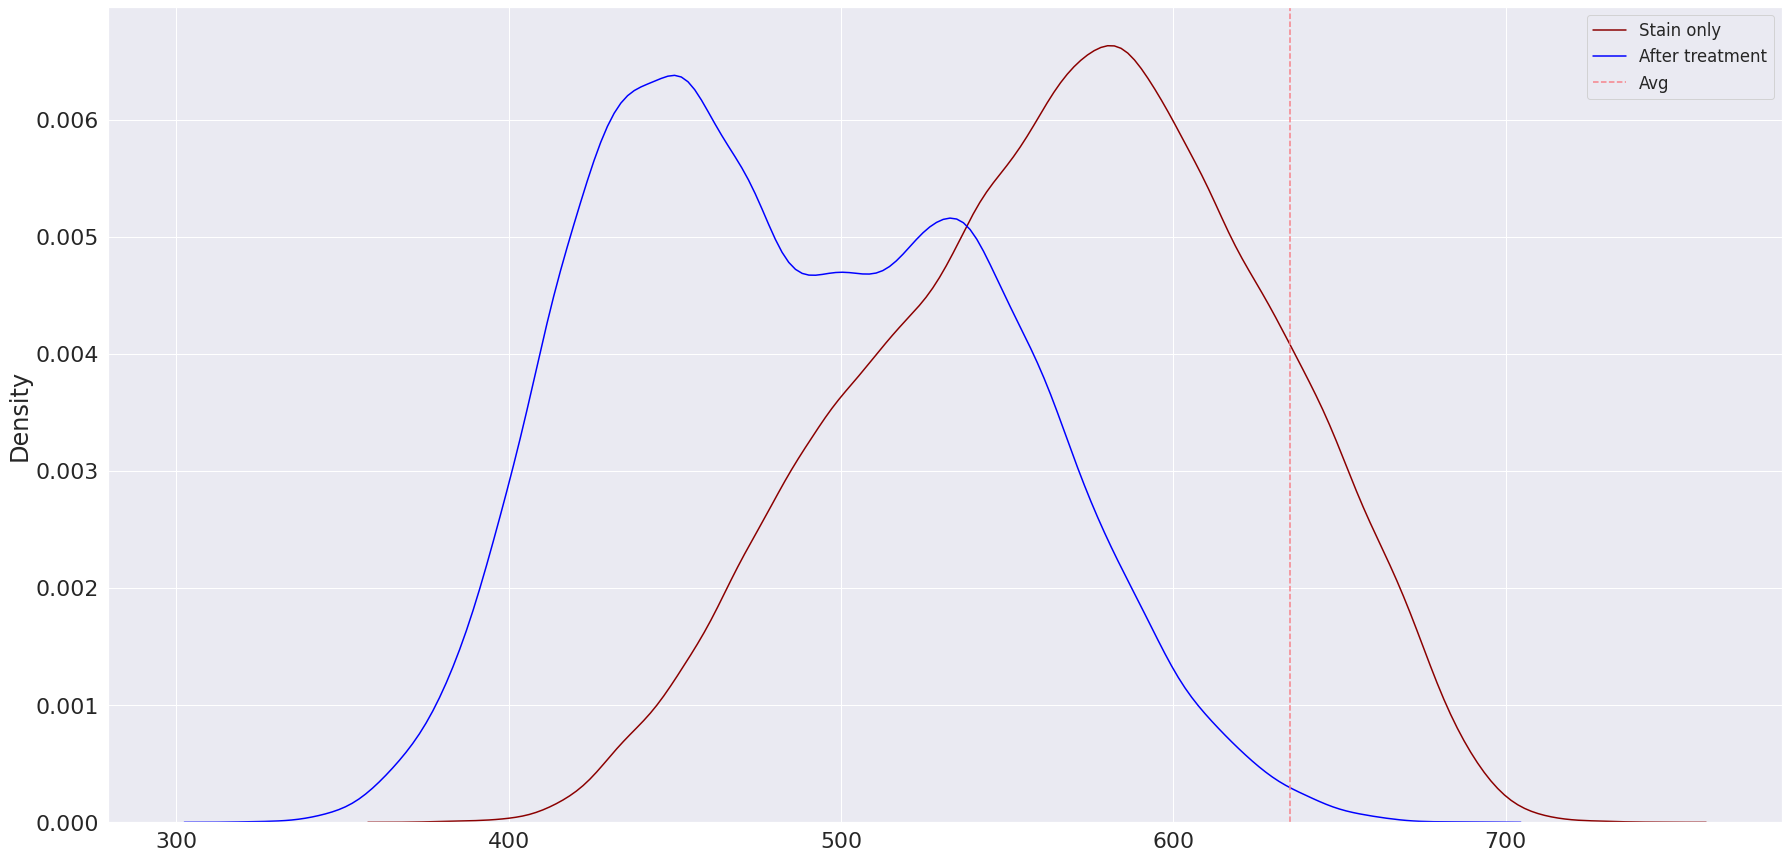

In [ ]:
sns.distplot(combined, color='darkred', hist=False)
sns.distplot(combined2, color='blue', hist=False)
# sns.distplot(back, color='green', hist=False)
plt.axvline(avg, color="#f68289", linestyle="--")
sns.set(rc={'figure.figsize':(30, 15)})
sns.set(font_scale=1.5)
plt.legend(loc='upper right', labels=["Stain only", "After treatment", "Avg"])
plt.show()
# plt.savefig('./drive/MyDrive/CHM327 Discovery Labs/Test2.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

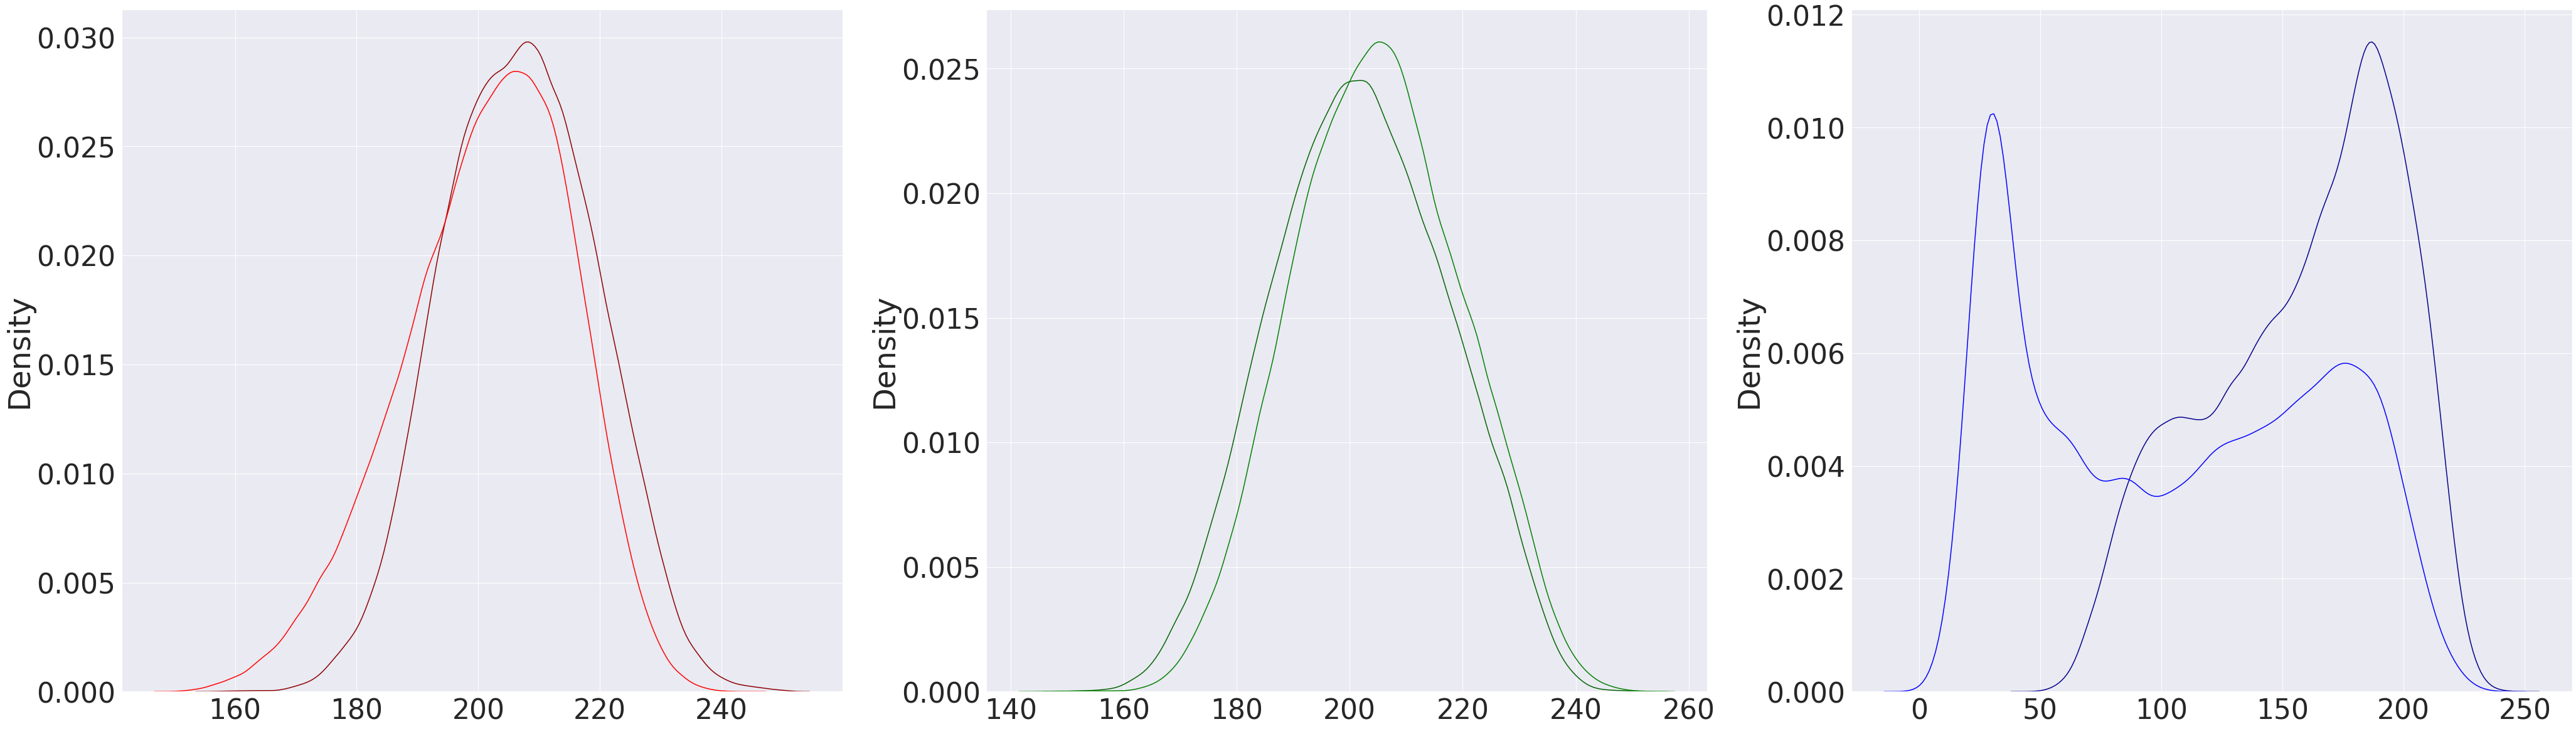

In [ ]:
fig, axes = plt.subplots(1, 3)
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(70,20)})
sns.set(font_scale=4)
# sns.kdeplot(ratios, bw=0.5)
sns.distplot(R, color='darkred', ax=axes[0], hist=False)
sns.distplot(R2, color='red', ax=axes[0], hist=False)
sns.distplot(G, color='darkgreen', ax=axes[1], hist=False)
sns.distplot(G2, color='green', ax=axes[1], hist=False)
sns.distplot(B, color='darkblue', ax=axes[2], hist=False)
sns.distplot(B2, color='blue', ax=axes[2], hist=False)
plt.savefig('./drive/MyDrive/CHM327 Discovery Labs/Test.png')
plt.show()

#Turmeric saturation

In [ ]:
path_to_turmeric = f'{path_to_pictures}/TidePen/Turmeric/1'
path_to_chili = f'{path_to_pictures}/TidePen/Chili/1'

In [ ]:
bef_t = cv2.imread(f'{path_to_turmeric}/TurmericStain-1.jpg')
# bef_t = cv2.cvtColor(bef_t, cv2.COLOR_BGR2HSV)
aft_t = cv2.imread(f'{path_to_turmeric}/TurmericTidePen-1.jpg')
# aft_t = cv2.cvtColor(aft_t, cv2.COLOR_BGR2HSV)
wash_t = cv2.imread(f'{path_to_turmeric}/TurmericTidePenDetergent-1.jpg')
wash_t = cv2.cvtColor(wash_t, cv2.COLOR_BGR2HSV)

In [ ]:
def get_sat(hsv_image):
  # rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
  stain_sat = []
  for y in range(len(hsv_image)):
        for x in range(len(hsv_image[0])):
            if hsv_image[y][x][0] <= 60 or hsv_image[y][x][0] > 112:
                # index_stain.append((x,y))
                stain_sat.append(hsv_image[y][x][1])
  return np.array(stain_sat)

In [ ]:
#Get the Saturation values of the stains only
bef_sat = get_sat(bef_t)
aft_sat = get_sat(aft_t)
wash_sat = get_sat(wash_t)

In [ ]:
#Get means
bef_mean = bef_sat.mean()
aft_mean = aft_sat.mean()
wash_mean = wash_sat.mean()
print(bef_mean, aft_mean, wash_mean)

61.49593439959241 126.73069592385731 64.99219155131836


#Testing for Cranberry Detergent control

In [ ]:
cran2 = f'{path_to_pictures}/DetergentControl/Cranberry/1/CranberryDetergent-1.JPG'
cran1 = f'{path_to_pictures}/DetergentControl/Cranberry/1/CranberryPreDetergent-1.JPG'

In [ ]:
b, a = calcRatio(bef_t, aft_t)

In [ ]:
# before, after = calcRatio2(cv2.imread(cran1), cv2.imread(cran2))
before, after = calcRatio2(bef_t, aft_t)


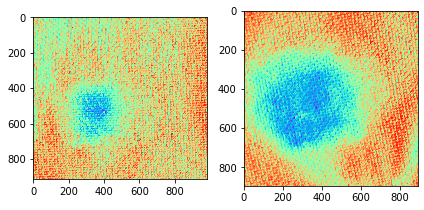

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#plt.imshow(before, cmap='rainbow', interpolation='nearest', ax=axes[0])
#plt.imshow(after, cmap='rainbow', interpolation='nearest', ax=axes[1])
a1 = ax1.imshow(before, cmap='rainbow', interpolation='nearest')
a2 = ax2.imshow(after, cmap='rainbow', interpolation='nearest')

fig.tight_layout()
plt.show()

In [ ]:
def find_stain(image):
    img = cv2.imread(image)
    final_arr = np.ones((len(img), len(img[0]), 3)) * 255
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    for y in range(len(img)):
        for x in range(len(img[0])):
            pixel_rgb = img[y][x]
            if hsv[y][x][0] <= 60 or hsv[y][x][0] > 112:
                final_arr[y][x] = pixel_rgb
    return final_arr

def display(image):
    image = image.astype(np.uint8)
    plt.imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

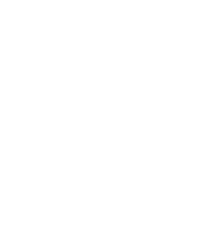

In [ ]:
arr = find_stain(test_chili)
display(arr)

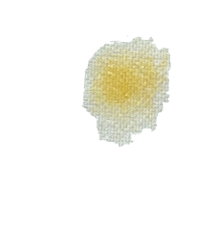

In [ ]:
arr = find_stain(f'{path_to_turmeric}/TurmericStain-1.jpg')
display(arr)

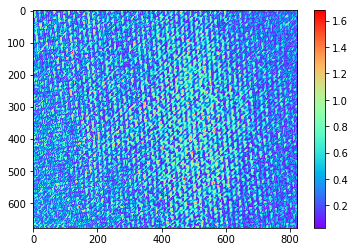

In [ ]:
ratios, x = calcRatio(cv2.imread(cran1), cv2.imread(cran2)) #has to be error in calcratio

plt.imshow(ratios, cmap='rainbow', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
arr = calcSatRatio(cv2.imread(cran1), cv2.imread(cran2), 2) # third arg is for pos in hsv array (0:hue, 1:sat, 2:value)

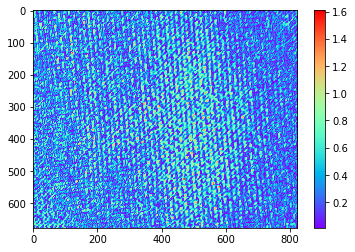

In [ ]:
plt.imshow(arr, cmap='rainbow', interpolation='nearest')
plt.colorbar()
plt.show()

##AI testing (NOT WORKING)

In [ ]:
chili_img = cv2.imread(f'{path_to_chili}/ChiliStain-1.jpg')
grey = cv2.cvtColor(chili_img, cv2.COLOR_BGR2GRAY)
# plt.imshow(grey, cmap='gray')

In [ ]:
hsv = cv2.cvtColor(chili_img, cv2.COLOR_BGR2HSV)

In [ ]:
def find_stain(image):
    final_arr = np.ones((len(image), len(image[0]), 3)) * 255
    pos = []
    for y in range(len(image)):
        for x in range(len(image[0])):
            pixel_rgb = image[y][x]
            if hsv[y][x][0] <= 60 or hsv[y][x][0] > 112:
                final_arr[y][x] = pixel_rgb
                pos.append((x, y))
    return final_arr.astype(np.uint8), pos

def display(image):
    plt.imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

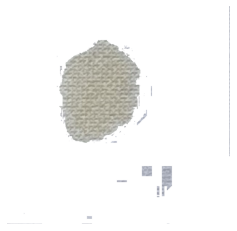

In [ ]:
arr, positions = find_stain(chili_img)
display(arr)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
Y = np.zeros(grey.shape)
for x, y in positions:
  Y[y][x] = 1
grey, Y = shuffle(grey, Y)
x_train, x_test, y_train, y_test = train_test_split(grey, Y, test_size=0.33)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [ ]:
SHAPE = (1, grey.shape[0], grey.shape[1])

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
if K.image_data_format() == 'channels_first':

    SHAPE = (1, grey.shape[0], grey.shape[1])
else:

    SHAPE = (grey.shape[0], grey.shape[1], 1)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=2, activation='relu', input_shape=SHAPE))
model.add(Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [ ]:
BATCH_SIZE = 100
EPOCHS = 3

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3


ValueError: ignored